## Import Library dan Membaca Dataset

Pertama, perlu membaca dataset terlebih dahulu. Saya memilih dataset south dengan jumlah 20000 data.

In [1]:
from pandas import read_csv
import numpy as np

dataset = read_csv('south_20000.csv')
dataset

index        Data   Hora  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0          0  2000-09-22  00:00                           -9999.0   
1          1  2000-09-22  01:00                           -9999.0   
2          2  2000-09-22  02:00                           -9999.0   
3          3  2000-09-22  03:00                           -9999.0   
4          4  2000-09-22  04:00                               0.0   
...      ...         ...    ...                               ...   
19994   5234  2002-08-07  02:00                           -9999.0   
19995   5235  2002-08-07  03:00                           -9999.0   
19996   5236  2002-08-07  04:00                           -9999.0   
19997   5237  2002-08-07  05:00                           -9999.0   
19998   5238  2002-08-07  06:00                           -9999.0   

       PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                                -9999.0       
1                                                -9999.0       
2                                                -9999.0       
3                                                -9999.0       
4                                                 1013.9       
...                                                  ...       
19994                                            -9999.0       
19995                                            -9999.0       
19996                                            -9999.0       
19997                                            -9999.0       
19998                                            -9999.0       

       PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              -9999.0   
1                                              -9999.0   
2                                              -9999.0   
3                                              -9999.0   
4                                               1014.2   
...                                                ...   
19994                                          -9999.0   
19995                                          -9999.0   
19996                                          -9999.0   
19997                                          -9999.0   
19998                                          -9999.0   

       PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
0                                               -9999.0   
1                                               -9999.0   
2                                               -9999.0   
3                                               -9999.0   
4                                                1013.2   
...                                                 ...   
19994                                           -9999.0   
19995                                           -9999.0   
19996                                           -9999.0   
19997                                           -9999.0   
19998                                           -9999.0   

       RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                        -9999                                       -9999.0   
1                        -9999                                       -9999.0   
2                        -9999                                       -9999.0   
3                        -9999                                       -9999.0   
4                        -9999                                          15.5   
...                        ...                                           ...   
19994                    -9999                                       -9999.0   
19995                    -9999                                       -9999.0   
19996                    -9999                                       -9999.0   
19997                    -9999                                       -9999.0   
19998                    -9999                                       -9999.0   

       TEMPERATURA DO PONTO DE ORVALHO (°C

## Pembersihan Data

Saya cek ada data duplikat pada dataset ini atau tidak.

In [2]:
duplicates = dataset.duplicated()
print(duplicates.any())


False


Saya sudah cek bahwa dataset ini tidak ada "NaN" sama sekali. Saya juga berasumsi bahwa tidak perlu identifikasi outlier karena pada tugas individu kali ini hanya membandingkan metode pengolahan data dan menampilkannya dalam distribusi data sebagai perbandingan

## Imputasi data

Saya menampilkan semua kolom pada dataset agar tau data kolom mana yang perlu dilakukan imputasi.

In [3]:
from pandas import set_option
set_option('display.max_columns', None)
dataset.head(20)


index        Data   Hora  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0       0  2000-09-22  00:00                           -9999.0   
1       1  2000-09-22  01:00                           -9999.0   
2       2  2000-09-22  02:00                           -9999.0   
3       3  2000-09-22  03:00                           -9999.0   
4       4  2000-09-22  04:00                               0.0   
5       5  2000-09-22  05:00                               0.0   
6       6  2000-09-22  06:00                               0.0   
7       7  2000-09-22  07:00                               0.0   
8       8  2000-09-22  08:00                               0.0   
9       9  2000-09-22  09:00                               0.0   
10     10  2000-09-22  10:00                               0.0   
11     11  2000-09-22  11:00                               0.0   
12     12  2000-09-22  12:00                               0.0   
13     13  2000-09-22  13:00                               0.0   
14     14  2000-09-22  14:00                               0.0   
15     15  2000-09-22  15:00                               0.0   
16     16  2000-09-22  16:00                               0.0   
17     17  2000-09-22  17:00                               0.0   
18     18  2000-09-22  18:00                               0.0   
19     19  2000-09-22  19:00                               0.0   

    PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                             -9999.0       
1                                             -9999.0       
2                                             -9999.0       
3                                             -9999.0       
4                                              1013.9       
5                                              1014.4       
6                                              1013.8       
7                                              1013.6       
8                                              1014.2       
9                                              1014.4       
10                                             1015.7       
11                                             1016.3       
12                                             1017.0       
13                                             1017.4       
14                                             1016.9       
15                                             1016.3       
16                                             1015.7       
17                                             1014.7       
18                                             1014.1       
19                                             1014.0       

    PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                           -9999.0   
1                                           -9999.0   
2                                           -9999.0   
3                                           -9999.0   
4                                            1014.2   
5                                            1014.7   
6                                            1014.7   
7                                            1014.0   
8                                            1014.2   
9                                            1014.4   
10                                           1015.7   
11                                           1016.3   
12                                           1017.0   
13                                           1017.4   
14                                           1017.5   
15                                           1016.9   
16                                           1016.3   
17                                           1015.7   
18                                           1014.8   
19                                           1014.2   

    PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  RADIACAO GLOBAL (Kj/m²)  \
0                                            -9999.0                    -9999   
1                

Saya mengasumsikan bahwa data kolom setelah data kolom "Hora" dan sebelum data kolom "region" yang perlu diperlihatkan distribusi nya. Saya asumsi data yang hilang yaitu -9999. Jadi saya akan saring data kolom yang akan diolah data nya seperti di bawah ini.

In [4]:
kolom = ["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)", "PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)", "PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)", "RADIACAO GLOBAL (Kj/m²)", "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)", "TEMPERATURA DO PONTO DE ORVALHO (°C)", "TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)", "TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)", "TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)", "TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)", "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)", "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)", "UMIDADE RELATIVA DO AR, HORARIA (%)", "VENTO, DIREÇÃO HORARIA (gr) (° (gr))", "VENTO, RAJADA MAXIMA (m/s)", "VENTO, VELOCIDADE HORARIA (m/s)"]
df = dataset[kolom]
df

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0                               -9999.0   
1                               -9999.0   
2                               -9999.0   
3                               -9999.0   
4                                   0.0   
...                                 ...   
19994                           -9999.0   
19995                           -9999.0   
19996                           -9999.0   
19997                           -9999.0   
19998                           -9999.0   

       PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                                -9999.0       
1                                                -9999.0       
2                                                -9999.0       
3                                                -9999.0       
4                                                 1013.9       
...                                                  ...       
19994                                            -9999.0       
19995                                            -9999.0       
19996                                            -9999.0       
19997                                            -9999.0       
19998                                            -9999.0       

       PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              -9999.0   
1                                              -9999.0   
2                                              -9999.0   
3                                              -9999.0   
4                                               1014.2   
...                                                ...   
19994                                          -9999.0   
19995                                          -9999.0   
19996                                          -9999.0   
19997                                          -9999.0   
19998                                          -9999.0   

       PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
0                                               -9999.0   
1                                               -9999.0   
2                                               -9999.0   
3                                               -9999.0   
4                                                1013.2   
...                                                 ...   
19994                                           -9999.0   
19995                                           -9999.0   
19996                                           -9999.0   
19997                                           -9999.0   
19998                                           -9999.0   

       RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                        -9999                                       -9999.0   
1                        -9999                                       -9999.0   
2                        -9999                                       -9999.0   
3                        -9999                                       -9999.0   
4                        -9999                                          15.5   
...                        ...                                           ...   
19994                    -9999                                       -9999.0   
19995                    -9999                                       -9999.0   
19996                    -9999                                       -9999.0   
19997                    -9999                                       -9999.0   
19998                    -9999                                       -9999.0   

       TEMPERATURA DO PONTO DE ORVALHO (°C)  \
0                                   -9999.0   
1                                   -9999.0   
2                                   -9999.0   
3                                   -9999.0   
4                                      14.6   
...                                     ...   
19994                    

Saya menampilkan distribusi data untuk kolom numerik pada df diatas.

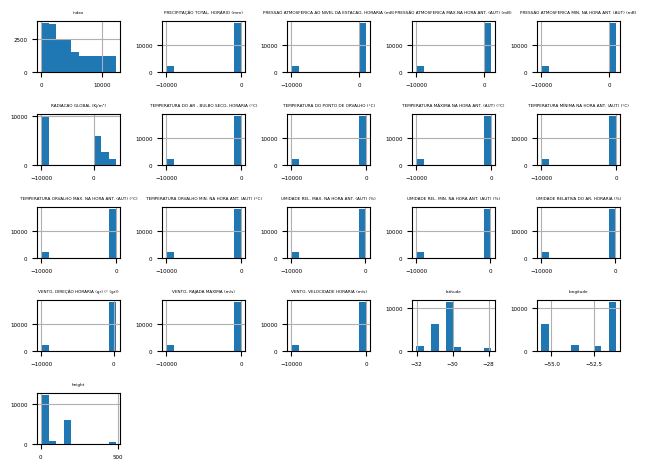

In [5]:
import matplotlib.pyplot as plt

fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(3) for x in fig.ravel()]
plt.tight_layout()

plt.show()

Karena data yang hilang adalah -9999 dan juga ada data temperatur, maka saya mengecek semua data pada df yang memiliki value dibawah -100 dan bukan dibawah 0 karena temperatur bisa saja sampai negatif. 

In [6]:
df[df < -100].count()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         2241
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    2255
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          2349
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         2349
RADIACAO GLOBAL (Kj/m²)                                  9939
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             2232
TEMPERATURA DO PONTO DE ORVALHO (°C)                     2233
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               2348
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               2348
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         2349
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         2349
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 2348
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 2348
UMIDADE RELATIVA DO AR, HORARIA (%)                      2232
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                     2329
VENTO, RAJADA MAXIMA (m/s)                               2360
VENTO, V

Selanjutnya saya mengubah value -9999 menjadi NaN agar value data -9999 bisa diimputasi menggunakan KNN ataupun Iterative.

In [7]:
df = df.replace(-9999, np.nan)
df

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   0.0   
...                                 ...   
19994                               NaN   
19995                               NaN   
19996                               NaN   
19997                               NaN   
19998                               NaN   

       PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                                    NaN       
1                                                    NaN       
2                                                    NaN       
3                                                    NaN       
4                                                 1013.9       
...                                                  ...       
19994                                                NaN       
19995                                                NaN       
19996                                                NaN       
19997                                                NaN       
19998                                                NaN       

       PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                               1014.2   
...                                                ...   
19994                                              NaN   
19995                                              NaN   
19996                                              NaN   
19997                                              NaN   
19998                                              NaN   

       PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                1013.2   
...                                                 ...   
19994                                               NaN   
19995                                               NaN   
19996                                               NaN   
19997                                               NaN   
19998                                               NaN   

       RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                          NaN                                           NaN   
1                          NaN                                           NaN   
2                          NaN                                           NaN   
3                          NaN                                           NaN   
4                          NaN                                          15.5   
...                        ...                                           ...   
19994                      NaN                                           NaN   
19995                      NaN                                           NaN   
19996                      NaN                                           NaN   
19997                      NaN                                           NaN   
19998                      NaN                                           NaN   

       TEMPERATURA DO PONTO DE ORVALHO (°C)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                      14.6   
...                                     ...   
19994                    

## KNN Imputer

In [8]:
from pandas import DataFrame
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer()

df_knn_imputed = knn_imputer.fit_transform(df)

df_knn_imputed = DataFrame(df_knn_imputed, columns=df.columns)
df_knn_imputed

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0                              0.173792   
1                              0.173792   
2                              0.173792   
3                              0.173792   
4                              0.000000   
...                                 ...   
19994                          0.173792   
19995                          0.173792   
19996                          0.173792   
19997                          0.173792   
19998                          0.173792   

       PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                             997.034023       
1                                             997.034023       
2                                             997.034023       
3                                             997.034023       
4                                            1013.900000       
...                                                  ...       
19994                                         997.034023       
19995                                         997.034023       
19996                                         997.034023       
19997                                         997.034023       
19998                                         997.034023       

       PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                           997.228918   
1                                           997.228918   
2                                           997.228918   
3                                           997.228918   
4                                          1014.200000   
...                                                ...   
19994                                       997.228918   
19995                                       997.228918   
19996                                       997.228918   
19997                                       997.228918   
19998                                       997.228918   

       PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
0                                            996.702504   
1                                            996.702504   
2                                            996.702504   
3                                            996.702504   
4                                           1013.200000   
...                                                 ...   
19994                                        996.702504   
19995                                        996.702504   
19996                                        996.702504   
19997                                        996.702504   
19998                                        996.702504   

       RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                  1290.859344                                     20.236675   
1                  1290.859344                                     20.236675   
2                  1290.859344                                     20.236675   
3                  1290.859344                                     20.236675   
4                   124.800000                                     15.500000   
...                        ...                                           ...   
19994              1290.859344                                     20.236675   
19995              1290.859344                                     20.236675   
19996              1290.859344                                     20.236675   
19997              1290.859344                                     20.236675   
19998              1290.859344                                     20.236675   

       TEMPERATURA DO PONTO DE ORVALHO (°C)  \
0                                 15.294422   
1                                 15.294422   
2                                 15.294422   
3                                 15.294422   
4                                 14.600000   
...                                     ...   
19994                    

In [9]:
fig = df_knn_imputed.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(3) for x in fig.ravel()]
plt.tight_layout()

plt.show()

## Iterative Imputer

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(max_iter=3000)

df_iterative_imputed = iterative_imputer.fit_transform(df)

df_iterative_imputed = DataFrame(df_iterative_imputed, columns=df.columns)
df_iterative_imputed

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0                              0.173753   
1                              0.173753   
2                              0.173753   
3                              0.173753   
4                              0.000000   
...                                 ...   
19994                          0.173753   
19995                          0.173753   
19996                          0.173753   
19997                          0.173753   
19998                          0.173753   

       PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                             997.047872       
1                                             997.047872       
2                                             997.047872       
3                                             997.047872       
4                                            1013.900000       
...                                                  ...       
19994                                         997.047872       
19995                                         997.047872       
19996                                         997.047872       
19997                                         997.047872       
19998                                         997.047872       

       PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                           997.313188   
1                                           997.313188   
2                                           997.313188   
3                                           997.313188   
4                                          1014.200000   
...                                                ...   
19994                                       997.313188   
19995                                       997.313188   
19996                                       997.313188   
19997                                       997.313188   
19998                                       997.313188   

       PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
0                                            996.786577   
1                                            996.786577   
2                                            996.786577   
3                                            996.786577   
4                                           1013.200000   
...                                                 ...   
19994                                        996.786577   
19995                                        996.786577   
19996                                        996.786577   
19997                                        996.786577   
19998                                        996.786577   

       RADIACAO GLOBAL (Kj/m²)  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
0                   849.363712                                     20.236675   
1                   849.363712                                     20.236675   
2                   849.363712                                     20.236675   
3                   849.363712                                     20.236675   
4                  -358.515980                                     15.500000   
...                        ...                                           ...   
19994               849.363712                                     20.236675   
19995               849.363712                                     20.236675   
19996               849.363712                                     20.236675   
19997               849.363712                                     20.236675   
19998               849.363712                                     20.236675   

       TEMPERATURA DO PONTO DE ORVALHO (°C)  \
0                                 15.294024   
1                                 15.294024   
2                                 15.294024   
3                                 15.294024   
4                                 14.600000   
...                                     ...   
19994                    

In [11]:
fig = df_iterative_imputed.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(3) for x in fig.ravel()]
plt.tight_layout()

plt.show()

## Kesimpulan

Dari percobaan diatas saya jadi tahu adanya perbedaan yang sangat jauh distribusi data dari dataset yang sebelum dilakukan imputasi seperti dibawah ini (mulai dari gambar distribusi yang ke 5) 
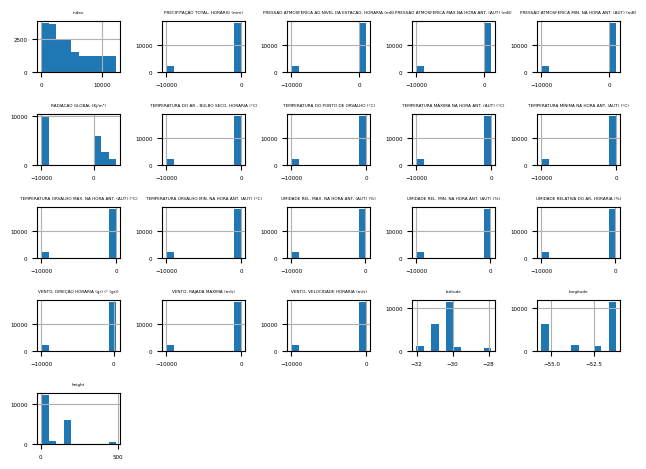

dan yang setelah dilakukan imputasi.
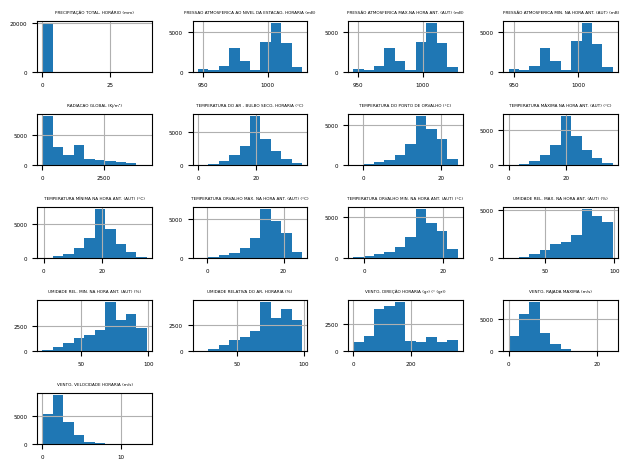

Distribusi datanya terlihat berbeda jauh. Setelah dilakukan imputasi, beberapa kolom data mempunyai distribusi menjadi <i>gaussian</i>. Saya jadi lebih tau bahwa imputasi merupakan cara yang efektif dalam menambahkan data yang hilang dibandingkan kita membuang data NaN.